In [1]:
# Cell 1: Config, imports, and auto-detect file paths
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Dataset root (same as preprocess.py)
DATASET_ROOT = Path(r"../../1ds006104")

# Find the first subject with both EDF and TSV
edf_file = None
tsv_file = None
for subject_dir in sorted(DATASET_ROOT.glob("sub-S15")):
    eeg_path = subject_dir / "ses-02" / "eeg"
    edf_file = next(eeg_path.glob("*_task-singlephoneme_eeg.edf"), None)
    tsv_file = next(eeg_path.glob("*_task-singlephoneme_events.tsv"), None)
    if edf_file and tsv_file:
        print(f"Using subject: {subject_dir.name}")
        break

if not edf_file or not tsv_file:
    raise FileNotFoundError("No valid subject found with both EEG and events files.")

# Trial extraction settings
tmin, tmax = -0.1, 0.5
sfreq_target = 256


Using subject: sub-S15


Extracting EDF parameters from c:\Users\Bely\Documents\Bar-llan\Second_semester\Datascience\1ds006104\sub-S01\ses-02\eeg\sub-S01_ses-02_task-singlephoneme_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6733999  =      0.000 ...  3366.999 secs...
Finding events on: Status
471 events found on stim channel Status
Event IDs: [    2 72857]
Finding events on: Status
471 events found on stim channel Status
Event IDs: [    2 72857]
Total consonant events: 60


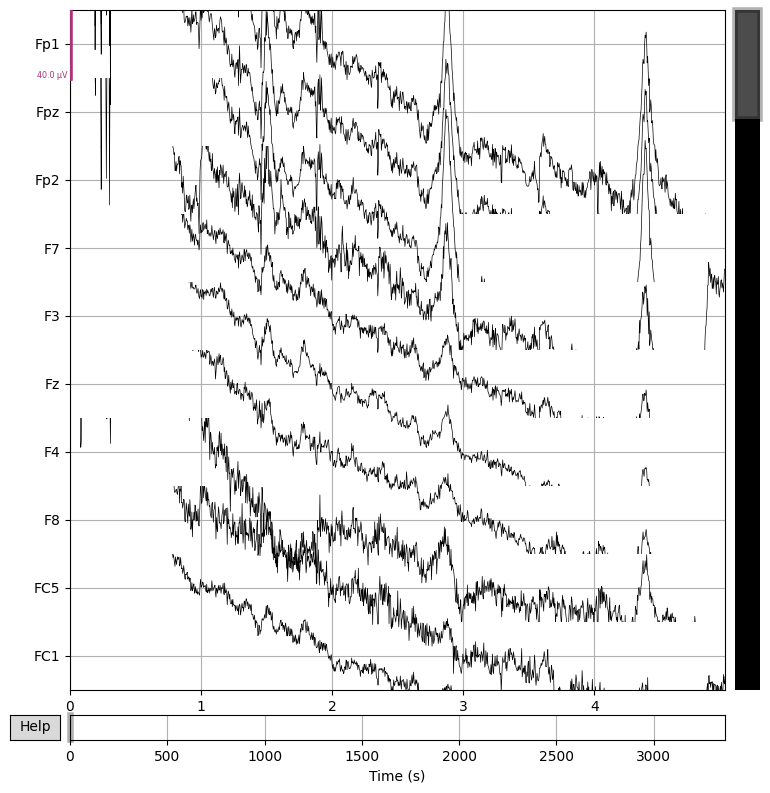

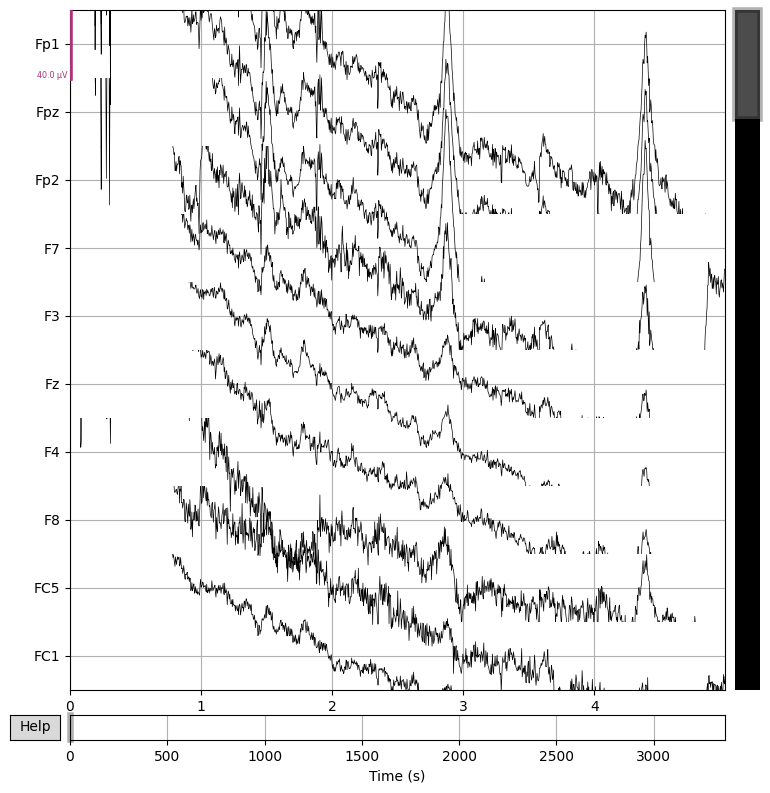

In [11]:
# Cell 2: Load EEG and events
raw = mne.io.read_raw_edf(edf_file, preload=True)
raw.resample(sfreq_target)

events_df = pd.read_csv(tsv_file, sep="\t")
consonants = set("bcdfghjklmnpqrstvwxyz")
events_df = events_df[
    (events_df["trial_type"] == "stimulus") &
    (events_df["phoneme1"].str.lower().isin(consonants))
]

print(f"Total consonant events: {len(events_df)}")
raw.plot(n_channels=10, duration=5)


Extracting EDF parameters from c:\Users\Bely\Documents\Bar-llan\Second_semester\Datascience\1ds006104\sub-S01\ses-02\eeg\sub-S01_ses-02_task-singlephoneme_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6733999  =      0.000 ...  3366.999 secs...
Finding events on: Status
471 events found on stim channel Status
Event IDs: [    2 72857]
Finding events on: Status
471 events found on stim channel Status
Event IDs: [    2 72857]
Total consonant events: 60


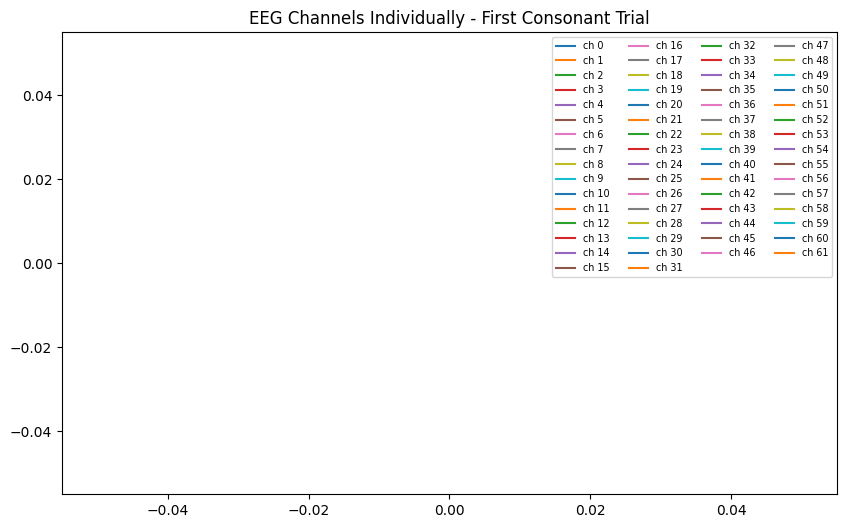

In [2]:
# --- Cell 2 Replacement ---
import matplotlib.pyplot as plt

# Load the EEG and events
raw = mne.io.read_raw_edf(edf_file, preload=True)
raw.resample(sfreq_target)

events_df = pd.read_csv(tsv_file, sep="\t")

# Filter for consonants
consonants = set("bcdfghjklmnpqrstvwxyz")
events_df = events_df[
    (events_df["trial_type"] == "stimulus") &
    (events_df["phoneme1"].str.lower().isin(consonants))
]

print(f"Total consonant events: {len(events_df)}")

# Extract EEG for the first consonant trial
first_event = events_df.iloc[0]
start_sample = int(first_event["onset"] * raw.info["sfreq"])
duration_samples = int(first_event["duration"] * raw.info["sfreq"])

trial_data, _ = raw[:, start_sample:start_sample + duration_samples]

# Plot channels manually (like your first example)
plt.figure(figsize=(10, 6))
for i, channel in enumerate(trial_data):
    plt.plot(channel, label=f'ch {i}')
plt.legend(loc='upper right', ncol=4, fontsize='x-small')
plt.title("EEG Channels Individually - First Consonant Trial")
plt.show()


In [4]:
# --- Cell 3 Replacement: Consonant EEG Heatmap ---
import matplotlib.pyplot as plt
import numpy as np

# Load raw EEG and events
raw = mne.io.read_raw_edf(edf_file, preload=True)
sfreq = raw.info["sfreq"]

events_df = pd.read_csv(tsv_file, sep="\t")
consonants = set("bcdfghjklmnpqrstvwxyz")
events_df = events_df[
    (events_df["trial_type"] == "stimulus") &
    (events_df["phoneme1"].str.lower().isin(consonants))
]

# Take the first consonant trial
first_event = events_df.iloc[0]
onset_sample = int(first_event["onset"] * sfreq)
start_sample = onset_sample - int(0.8 * sfreq)
end_sample = start_sample + int(1.0 * sfreq)  # same TIME_WINDOW as preprocessing

# Extract EEG, filter, z-score, remove noisy channels
eeg = raw.get_data(start=start_sample, stop=end_sample)
eeg = (eeg - np.mean(eeg, axis=1, keepdims=True)) / np.std(eeg, axis=1, keepdims=True)
eeg = eeg[np.max(np.abs(eeg), axis=1) < 10.0, :]  # remove noisy channels

# Plot heatmap like your original cell
plt.figure(figsize=(10, 5))
plt.imshow(eeg, aspect="auto", cmap="RdBu_r", origin="lower")
plt.colorbar(label="z-score")
plt.title(f"Subject: S01, Phoneme: {first_event['phoneme1']}")
plt.xlabel("Time (samples)")
plt.ylabel("Channels")
plt.tight_layout()
plt.show()


Extracting EDF parameters from c:\Users\Bely\Documents\Bar-llan\Second_semester\Datascience\1ds006104\sub-S15\ses-02\eeg\sub-S15_ses-02_task-singlephoneme_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6765999  =      0.000 ...  3382.999 secs...



KeyboardInterrupt



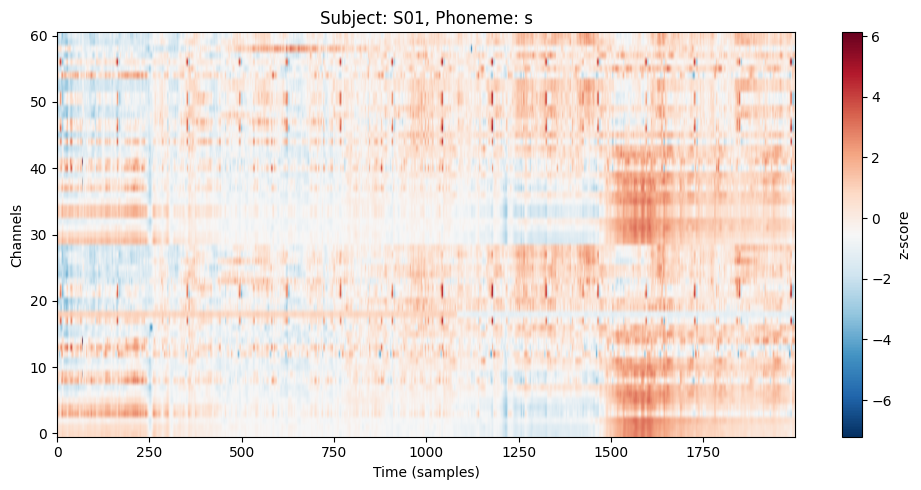

In [3]:
# Plot heatmap like your original cell
plt.figure(figsize=(10, 5))
plt.imshow(eeg, aspect="auto", cmap="RdBu_r", origin="lower")
plt.colorbar(label="z-score")
plt.title(f"Subject: S01, Phoneme: {first_event['phoneme1']}")
plt.xlabel("Time (samples)")
plt.ylabel("Channels")
plt.tight_layout()
plt.show()



#   After Preprcessing
## EEG Phoneme & Vowel/Consonant Analysis Notebook

This notebook analyzes preprocessed EEG features for **single-phoneme** and **vowel vs. consonant** decoding.  
It focuses on the **data science aspects** your teacher expects: dataset overview, signal/feature checks, feature-space exploration, and model evaluation with clear visuals.

**Inputs (expected in `processed_data/`):**
- `X.csv` — feature matrix (samples × features)
- `y.csv` — numeric phoneme labels aligned to `labels.txt`
- `labels.txt` — comma-separated list mapping numeric labels to phoneme strings

> If your file names/paths differ, edit the variables in the **Configuration** cell below.


In [2]:

# === Configuration ===
SEED = 42
X_CSV = "../processed_data/X.csv"
Y_CSV = "../processed_data/y.csv"
LABELS_FILE = "../processed_data/labels.txt"

# === Imports ===
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import (confusion_matrix, classification_report, 
                             accuracy_score, roc_curve, auc)
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif

# Matplotlib defaults (no custom styles/colors for portability)
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True
np.random.seed(SEED)


## 1) Load Data

In [3]:

# Load preprocessed features and labels
X = pd.read_csv(X_CSV).values
y = pd.read_csv(Y_CSV).values.flatten()

with open(LABELS_FILE, "r", encoding="utf-8") as f:
    phoneme_labels = f.read().strip().split(",")

# Map numeric labels -> phoneme strings
y_phonemes = np.array([phoneme_labels[int(lbl)] for lbl in y])

# Basic shapes
print(f"Feature matrix shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Unique classes (phonemes): {sorted(set(y_phonemes))}")


Feature matrix shape: (2750, 620)
Labels shape: (2750,)
Unique classes (phonemes): [np.str_('a'), np.str_('b'), np.str_('d'), np.str_('e'), np.str_('i'), np.str_('o'), np.str_('p'), np.str_('s'), np.str_('t'), np.str_('u'), np.str_('z')]


## 2) Dataset Overview

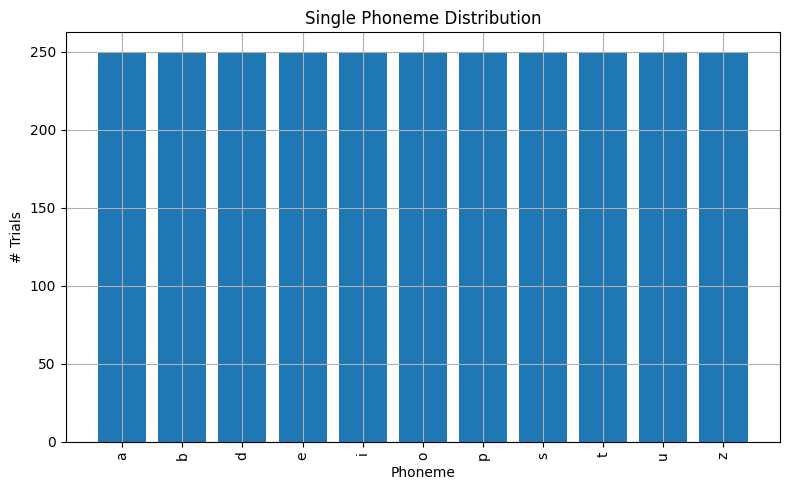

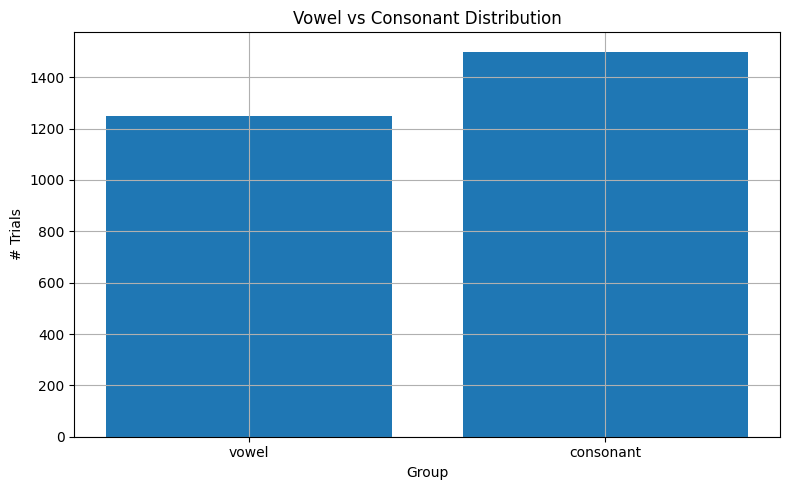

Counts per phoneme: {np.str_('a'): 250, np.str_('i'): 250, np.str_('e'): 250, np.str_('u'): 250, np.str_('o'): 250, np.str_('s'): 250, np.str_('z'): 250, np.str_('p'): 250, np.str_('b'): 250, np.str_('t'): 250, np.str_('d'): 250}
Counts Vowel/Consonant: {np.str_('vowel'): 1250, np.str_('consonant'): 1500}


In [4]:

# --- Single-phoneme distribution (bar chart) ---
counts = Counter(y_phonemes)
labels_sorted = sorted(counts.keys())
vals = [counts[k] for k in labels_sorted]

plt.figure()
plt.bar(range(len(labels_sorted)), vals)
plt.xticks(range(len(labels_sorted)), labels_sorted, rotation=90)
plt.title("Single Phoneme Distribution")
plt.xlabel("Phoneme")
plt.ylabel("# Trials")
plt.tight_layout()
plt.show()

# --- Vowel vs Consonant grouping ---
vowel_set = {"a","e","i","o","u","ɑ","ɛ","ou","oʊ"}  # include variants seen in datasets
y_grouped = np.array(["vowel" if p in vowel_set else "consonant" for p in y_phonemes])
counts_vc = Counter(y_grouped)

plt.figure()
plt.bar(list(counts_vc.keys()), list(counts_vc.values()))
plt.title("Vowel vs Consonant Distribution")
plt.xlabel("Group")
plt.ylabel("# Trials")
plt.tight_layout()
plt.show()

print("Counts per phoneme:", dict(counts))
print("Counts Vowel/Consonant:", dict(counts_vc))


## 3) Feature Preparation (to mirror training)

In [5]:

# Select top-k features via mutual information (mirrors your train.py approach)
top_k = 50
mi = mutual_info_classif(X, y, discrete_features=False, random_state=SEED)
top_idx = np.argsort(mi)[::-1][:top_k]
X_top = X[:, top_idx]

# Scale
scaler = StandardScaler()
X_top_scaled = scaler.fit_transform(X_top)

print(f"Using top {top_k} features for analysis visuals.")


NameError: name 'mutual_info_classif' is not defined

## 4) Feature Space Exploration

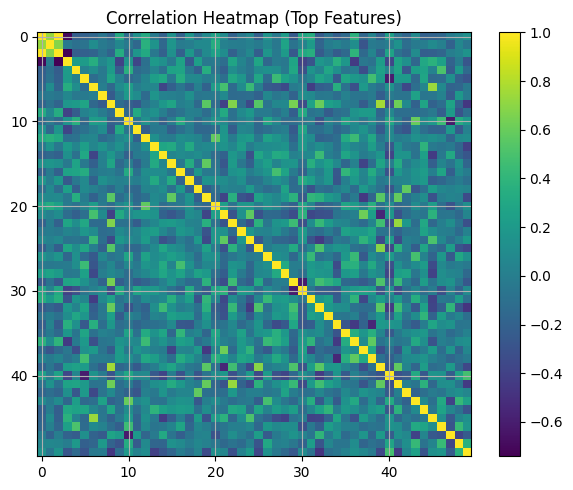

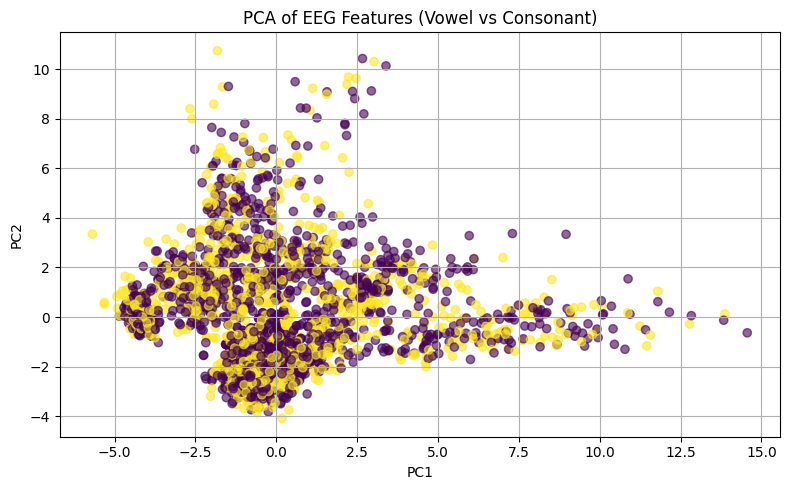

Explained variance by PC1+PC2: 26.43%


In [ ]:

# --- Correlation heatmap (on top features) ---
# (Compute correlation on a subset to keep plot readable if top_k is large)
corr = np.corrcoef(X_top_scaled.T)
plt.figure(figsize=(6,5))
plt.imshow(corr, aspect='auto', interpolation='nearest')
plt.colorbar()
plt.title("Correlation Heatmap (Top Features)")
plt.tight_layout()
plt.show()

# --- PCA projection colored by vowel/consonant ---
label_encoder_vc = LabelEncoder()
y_vc_encoded = label_encoder_vc.fit_transform(y_grouped)

pca = PCA(n_components=2, random_state=SEED)
X_pca = pca.fit_transform(X_top_scaled)

plt.figure()
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y_vc_encoded, alpha=0.6)
plt.title("PCA of EEG Features (Vowel vs Consonant)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

print(f"Explained variance by PC1+PC2: {pca.explained_variance_ratio_[:2].sum():.2%}")


## 5) Train/Test Split Summary (mirroring training logic)


## 9) Discussion & Guidance for the Report

- **Dataset balance:** Figures show class imbalance across the 11 phonemes, explaining difficulty in the multi-class task.
- **Feature structure:** Correlation heatmap suggests redundancy among some features; PCA shows partial separability for vowel vs consonant.
- **Performance patterns:** Confusion matrices reveal which classes are commonly confused—often those with similar articulatory properties.
- **Binary improvement:** Grouping into two categories (vowel/consonant) yields substantially higher accuracy and AUC, demonstrating that neural responses encode broad phonetic categories more reliably than fine-grained phoneme identities with non-invasive EEG.
- **Limits & Next steps:** Consider per-subject models, time–frequency features (e.g., wavelets), channel selection, and longer time windows. Larger datasets and subject adaptation typically improve results.

> You can export plots directly from this notebook for your documentation. Reference them as Figure 1–5 in your report.
